In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '..')

%matplotlib inline
sns.set()

In [2]:
import glob

In [3]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-47-44/train/results.csv')
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-00/train/results.csv')
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-20/train/results.csv')
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-40/train/results.csv')

In [4]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

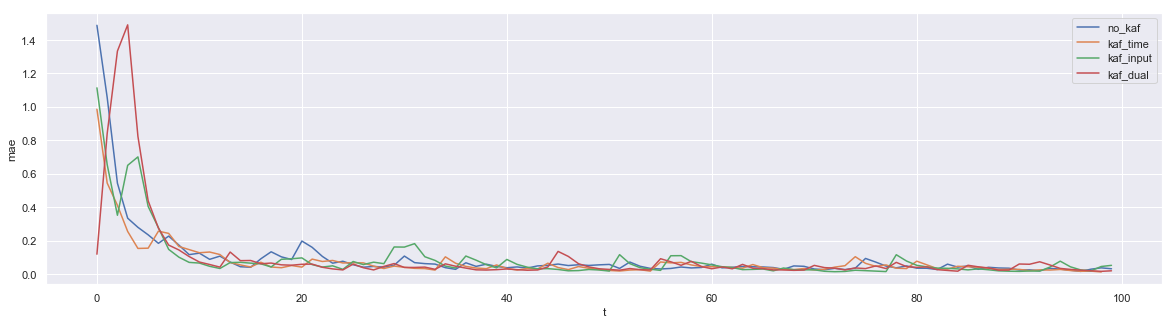

In [5]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

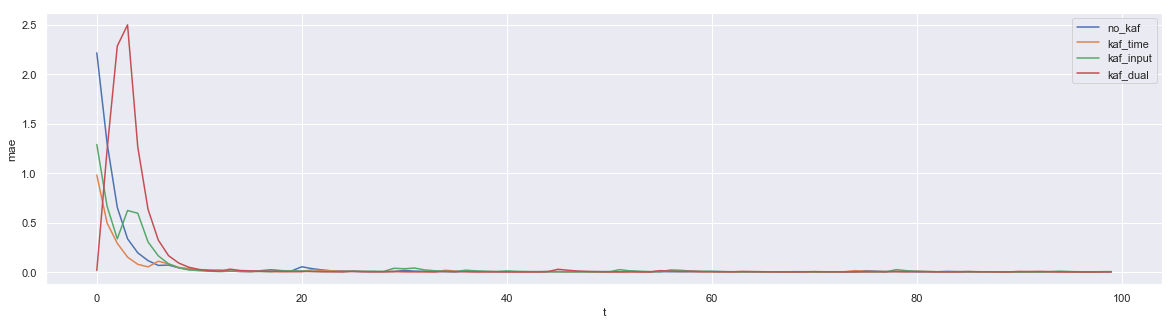

In [6]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [7]:

rows = ['no_kaf','kaf_time','kaf_input', 'kaf_dual']

table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.078957,8.064336,0.033064,0.078957,0.125331,0.078957,65.937515
kaf_time,0.064236,6.816854,0.017319,0.064236,0.107159,0.064236,90.419360
kaf_input,0.079383,8.035255,0.033960,0.079383,0.104663,0.079383,32.559743
kaf_dual,0.095523,6.903344,0.089160,0.095523,0.106509,0.095523,104.424889


In [8]:
header = table.index.tolist()

In [17]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-47-44/test/results.csv', names=header)
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-00/test/results.csv', names=header)
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-20/test/results.csv', names=header)
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-40/test/results.csv', names=header)

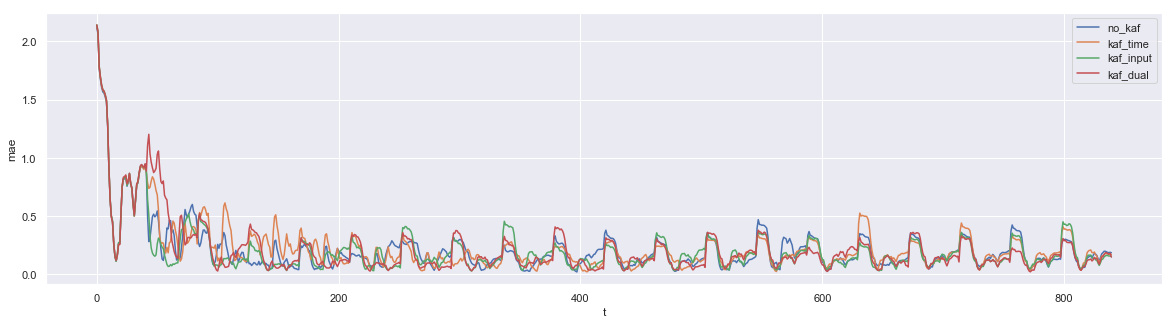

In [18]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [19]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [20]:
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.210245,9.353506,0.094880,0.210245,0.285631,0.210245,77.038166
kaf_time,0.225847,8.415277,0.105452,0.225847,0.309726,0.225847,81.253857
kaf_input,0.201119,11.174185,0.090615,0.201119,0.261420,0.201119,45.441643
kaf_dual,0.210961,8.683827,0.105234,0.210961,0.279114,0.210961,60.301030


In [34]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-47-44/report/94320_report.csv', index_col=0)
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-00/report/94362_report.csv', index_col=0)
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-20/report/94320_report.csv', index_col=0)
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-40/report/94367_report.csv', index_col=0)

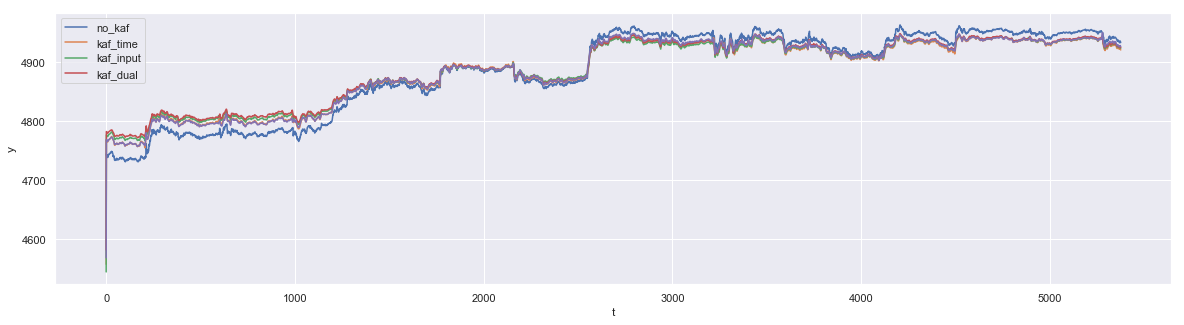

In [35]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [ ]:
## Something is wrong with those numbers

In [36]:
from ntsa.utils.misc import regr_metrics

In [37]:
y = df_no_kaf.y.values
y_no_kaf = df_no_kaf.y_hat.values
y_kaf_time = df_kaf_time.y_hat.values
y_kaf_input = df_kaf_input.y_hat.values
y_kaf_dual = df_kaf_dual.y_hat.values

In [38]:
metrics = [
list(regr_metrics(y, y_no_kaf).values()),
list(regr_metrics(y, y_kaf_time).values()),
list(regr_metrics(y, y_kaf_input).values()),
list(regr_metrics(y, y_kaf_dual).values())
]

In [39]:
pd.DataFrame(np.array(metrics), index=['no_kaf', 'time', 'input', 'dual'], columns=['mse', 'mae', 'smape', 'mape'])

,mse,mae,smape,mape
no_kaf,189.874133,12.159278,0.002498,0.249746
time,272.356070,14.034731,0.002888,0.288562
input,290.094683,13.690350,0.002822,0.281828
dual,164.884931,11.094714,0.002281,0.228045
